In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

C:\Users\elado\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Download ask and bid datasets

df_Ask = pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")
df_Bid = pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")

In [3]:
print(df_Ask.head(3))
print(df_Ask.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.102  24.125  24.083  24.125    0.351
1  2023.01.02 23:05:00  24.094  24.188  24.094  24.141    1.155
2  2023.01.02 23:10:00  24.143  24.148  24.022  24.027    0.882
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.781  22.781  22.776  22.776   0.4212
35218  2023.06.30 20:50:00  22.776  22.797  22.774  22.786   0.6836
35219  2023.06.30 20:55:00  22.786  22.811  22.786  22.811   0.3712


In [4]:
print(df_Bid.head(3))
print(df_Bid.tail(3))

            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.036  24.059  24.017  24.059   0.3480
1  2023.01.02 23:05:00  24.064  24.130  24.064  24.092   1.8458
2  2023.01.02 23:10:00  24.094  24.098  23.972  23.977   0.9030
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.751  22.751  22.746  22.746    0.069
35218  2023.06.30 20:50:00  22.746  22.761  22.736  22.756    0.216
35219  2023.06.30 20:55:00  22.756  22.766  22.701  22.745    0.327


In [5]:
df_Ask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [6]:
df_Bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


### Merge Two DataFrames

In [7]:
df = df_Bid.merge(df_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')
#We are using Time(UTC) because rows numbers and 'Time (UTC)' are the same in the rows with the same indices 
#for Ask and Bid datasets

df

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35220 entries, 0 to 35219
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open_x      35220 non-null  float64
 2   High_x      35220 non-null  float64
 3   Low_x       35220 non-null  float64
 4   Close_x     35220 non-null  float64
 5   Volume _x   35220 non-null  float64
 6   Open_y      35220 non-null  float64
 7   High_y      35220 non-null  float64
 8   Low_y       35220 non-null  float64
 9   Close_y     35220 non-null  float64
 10  Volume _y   35220 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.2+ MB


No NaN elements ! It's Good !

In [9]:
df.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [10]:
df.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.351
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.155
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.882


In [11]:
df.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,23.357365,23.374611,23.338437,23.357367,8.283187,23.387577,23.404824,23.368703,23.387501,35.095338
std,1.368781,1.368825,1.368926,1.368867,8.976407,1.368779,1.368797,1.368944,1.368861,39.024921
min,19.893000,19.914000,19.888000,19.893000,0.000000,19.923000,19.944000,19.918000,19.923000,0.000000
25%,22.421750,22.440000,22.400000,22.421000,2.611050,22.452000,22.470000,22.430000,22.451000,9.467675
50%,23.560000,23.576000,23.543000,23.560000,5.331100,23.590000,23.607000,23.573000,23.590000,22.237450
75%,24.122000,24.144000,24.103000,24.122000,10.686275,24.153000,24.174000,24.133000,24.152000,46.639375
max,26.118000,26.123000,26.098000,26.118000,120.651700,26.148000,26.153000,26.128000,26.148000,365.632200


In [12]:
df.shape

(35220, 11)

### Data Visualisation (Plot price and volume charts)

In [13]:
#Just in case, if graphs wanted to be drawn later, after the training, this non-normalised df_visualisation can be used.

df_visualisation = df

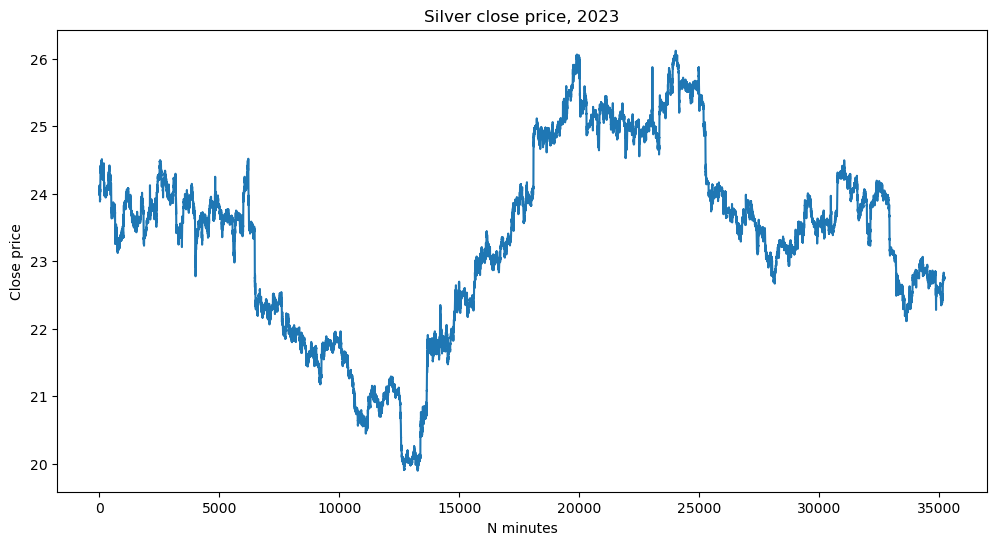

In [14]:
# Chart for close bid

plt.figure(figsize=(12,6))
plt.plot(df_visualisation['Close_Bid'])
plt.title('Silver close price, 2023')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

In [19]:
'''

#Candlestick chart for 70 minutes
import mplfinance as mpf

#Datachart only 
data_chart = df.set_index('Local_time_T', inplace=False)
data_chart = data_chart.drop(['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask'],axis=1)
#data_chart = data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs','Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)

data_chart.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
mpf.plot(data_chart.iloc[0:70], type='candle', style='charles', title='GOLD Candlestick Chart', volume=True)

'''

"\n\n#Candlestick chart for 70 minutes\nimport mplfinance as mpf\n\n#Datachart only \ndata_chart = df.set_index('Local_time_T', inplace=False)\ndata_chart = data_chart.drop(['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask'],axis=1)\n#data_chart = data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs','Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)\n\ndata_chart.columns = ['Open', 'High', 'Low', 'Close', 'Volume']\nmpf.plot(data_chart.iloc[0:70], type='candle', style='charles', title='GOLD Candlestick Chart', volume=True)\n\n"

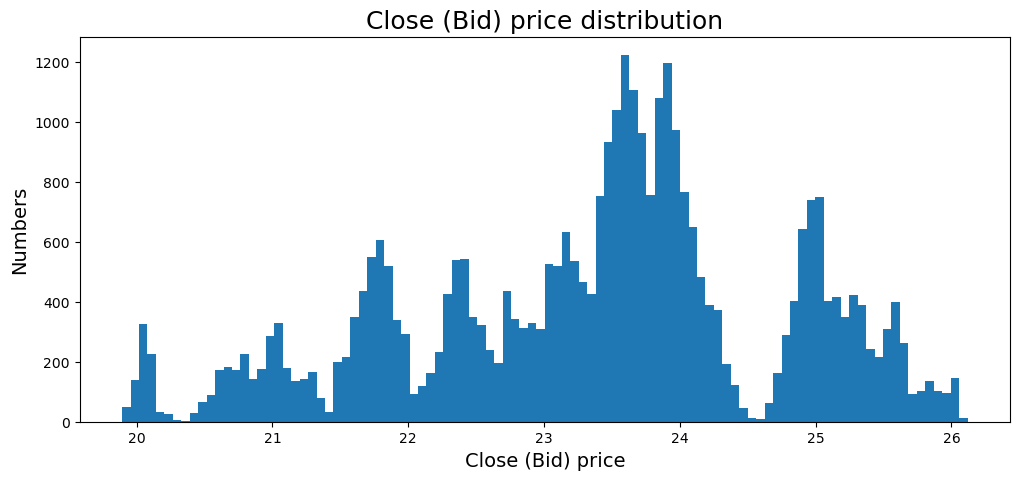

In [15]:
# Histogram for close bid

plt.figure(num=1,figsize=(12,5))
plt.hist(df_visualisation['Close_Bid'],bins=100)
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Close (Bid) price',size=14);

In [38]:
'''For 

volume_bid distribution
volume_ask distribution
open_delta price distribution
close_delta price distribution
volume_delta distribution
Volume_Delta_abs distribution 

you can use histogram plot.'''

'For \n\nvolume_bid distribution\nvolume_ask distribution\nopen_delta price distribution\nclose_delta price distribution\nvolume_delta distribution\nVolume_Delta_abs distribution \n\nyou can use histogram plot.'

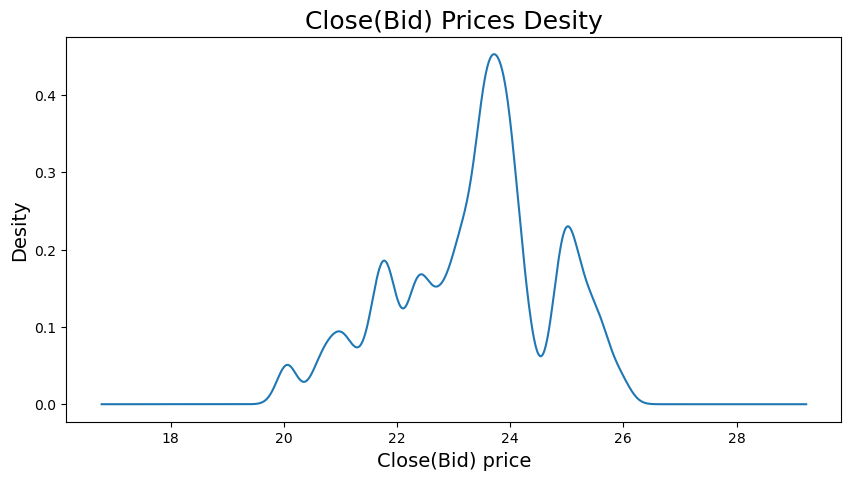

In [16]:
# kde for close bid

plt.figure(num=1, figsize=(10,5))
df_visualisation['Close_Bid'].plot.kde()
plt.title('Close(Bid) Prices Desity', size=18)
plt.ylabel('Desity', size=14)
plt.xlabel('Close(Bid) price', size=14);

<Figure size 1200x500 with 0 Axes>

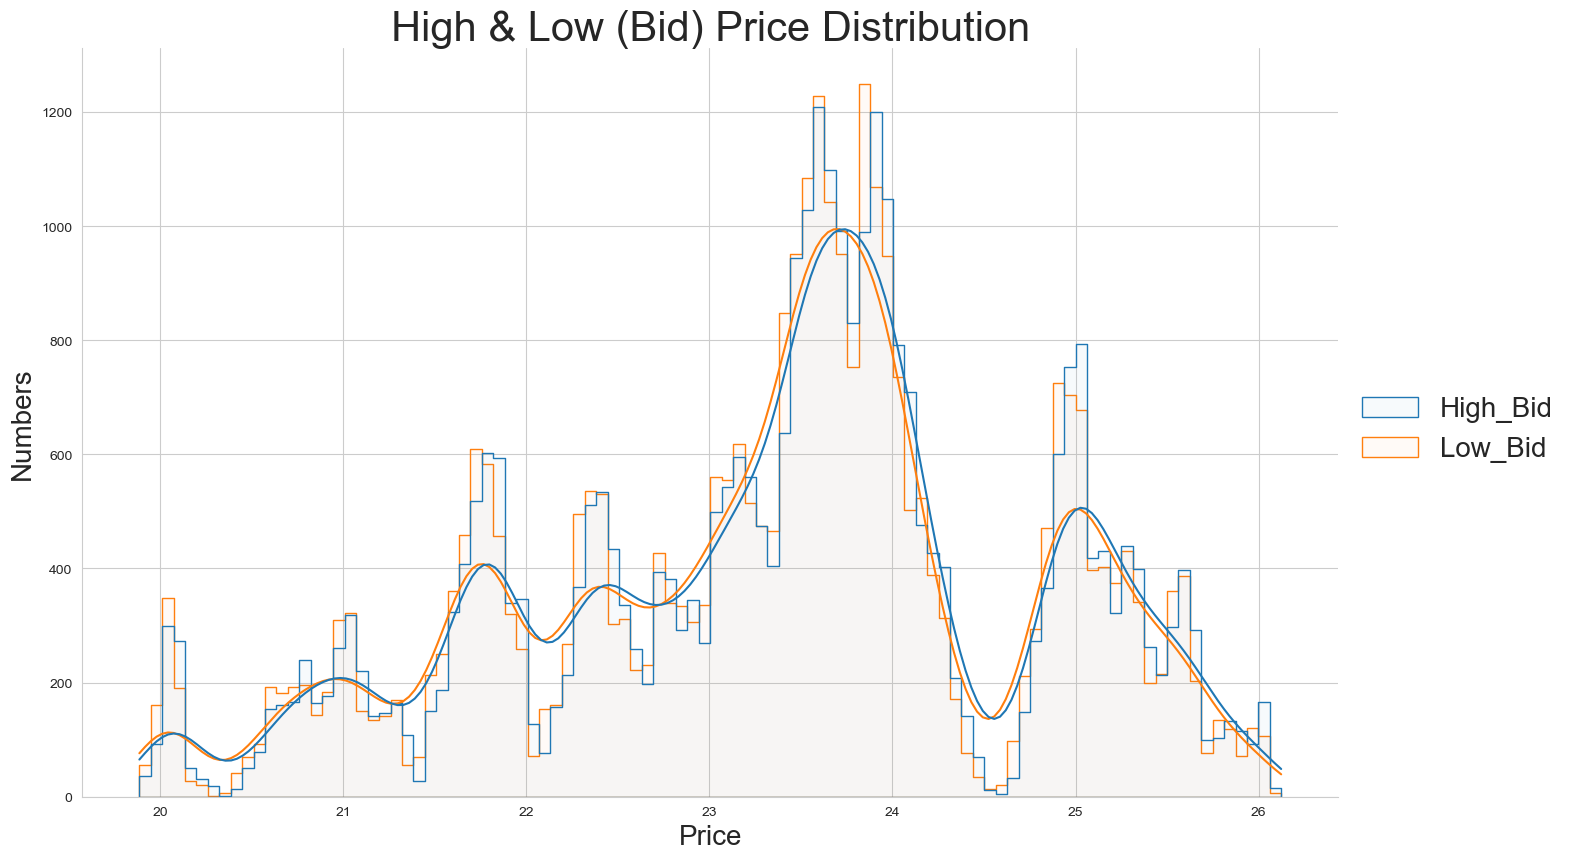

In [17]:
# High and Low price distribution

fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            df_visualisation[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species", 
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

### Indicate starts of days and weeks

In [18]:
import datetime

df['Local_time_T'] = pd.to_datetime(df['Local time'], utc=True)
df = df.drop(['Local time'], axis=1)

#df = df.drop(['Local time'], axis=1) #We know time frame duration - 5mins

In [19]:
#df.shape

In [20]:
#df.head(3)

In [21]:
# Create a new time column by moving it down one row

df['Local_time_T_shipt_1_Down'] = df['Local_time_T'].shift(1)

In [22]:
#Calculate the time interval with the previous row

df["Local_time_T_Delta"] = df["Local_time_T"] - df["Local_time_T_shipt_1_Down"]

In [23]:
df.head(-5)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta
0,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510,2023-01-02 23:00:00+00:00,NaT,NaT
1,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550,2023-01-02 23:05:00+00:00,2023-01-02 23:00:00+00:00,0 days 00:05:00
2,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820,2023-01-02 23:10:00+00:00,2023-01-02 23:05:00+00:00,0 days 00:05:00
3,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940,2023-01-02 23:15:00+00:00,2023-01-02 23:10:00+00:00,0 days 00:05:00
4,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044,2023-01-02 23:20:00+00:00,2023-01-02 23:15:00+00:00,0 days 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35210,22.758,22.760,22.742,22.743,3.7139,22.788,22.790,22.772,22.773,6.3546,2023-06-30 20:10:00+00:00,2023-06-30 20:05:00+00:00,0 days 00:05:00
35211,22.746,22.753,22.738,22.748,1.0326,22.776,22.783,22.768,22.778,2.3477,2023-06-30 20:15:00+00:00,2023-06-30 20:10:00+00:00,0 days 00:05:00
35212,22.742,22.753,22.738,22.748,1.7904,22.772,22.783,22.768,22.778,4.5415,2023-06-30 20:20:00+00:00,2023-06-30 20:15:00+00:00,0 days 00:05:00
35213,22.733,22.747,22.728,22.742,1.9267,22.763,22.777,22.758,22.772,3.4873,2023-06-30 20:25:00+00:00,2023-06-30 20:20:00+00:00,0 days 00:05:00


In [24]:
# The start of the year is the start of a week
# Therefore, we change the time interval to 2 days (the duration of the weekend).

df['Local_time_T_Delta'].iloc[0] = "2 days 01:05:00"
df['Local_time_T_Delta'].iloc[0]

C:\Users\elado\AppData\Local\Temp\ipykernel_12284\1385817997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Local_time_T_Delta'].iloc[0] = "2 days 01:05:00"


Timedelta('2 days 01:05:00')

In [25]:
#Find intervals which are longer than 5 minutes

df[['Local_time_T_Delta']][df["Local_time_T_Delta"] > '0 days 00:05:00'].value_counts(sort=False)

Local_time_T_Delta
0 days 01:05:00       99
0 days 03:35:00        2
0 days 05:05:00        1
2 days 00:05:00        1
2 days 01:05:00       24
3 days 01:05:00        1
dtype: int64

In [26]:
#Create a new dataframe called 'new_day' with the beginning of the days

new_day = df[['Local_time_T_Delta']][df["Local_time_T_Delta"] > '0 days 00:05:00']

In [27]:
new_day['Local_time_T_Delta'].value_counts(sort=False)

2 days 01:05:00    24
0 days 01:05:00    99
0 days 05:05:00     1
2 days 00:05:00     1
3 days 01:05:00     1
0 days 03:35:00     2
Name: Local_time_T_Delta, dtype: int64

In [28]:
#Find intervals which are longer than 1 day

df[['Local_time_T_Delta']][df['Local_time_T_Delta'] > '1 days 00:00:00'].value_counts(sort=False)

Local_time_T_Delta
2 days 00:05:00        1
2 days 01:05:00       24
3 days 01:05:00        1
dtype: int64

In [29]:
#Create a new dataframe called 'new_week' with the beginning of the weeks

new_week = df[df["Local_time_T_Delta"] > '1 days 00:00:00']

In [30]:
new_week["Local_time_T_Delta"].value_counts(sort=False)

2 days 01:05:00    24
2 days 00:05:00     1
3 days 01:05:00     1
Name: Local_time_T_Delta, dtype: int64

In [31]:
#Create new columns in df

df['New_day'] = 0
df['New_week'] = 0

In [32]:
#Fill 1s for new days and new weeks

df.loc[df["Local_time_T_Delta"] > '0 days 00:05:00', 'New_day'] = 1
df.loc[df["Local_time_T_Delta"] > '1 days 00:00:00', 'New_week'] = 1

In [33]:
df[df["New_day"] == 1]

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta,New_day,New_week
0,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.35100,2023-01-02 23:00:00+00:00,NaT,2 days 01:05:00,1,1
276,23.953,23.987,23.953,23.955,0.4466,24.047,24.079,23.985,23.985,0.80440,2023-01-03 23:00:00+00:00,2023-01-03 21:55:00+00:00,0 days 01:05:00,1,0
552,23.744,23.780,23.718,23.768,1.4210,23.806,23.813,23.789,23.798,1.62080,2023-01-04 23:00:00+00:00,2023-01-04 21:55:00+00:00,0 days 01:05:00,1,0
828,23.199,23.241,23.196,23.201,1.0856,23.288,23.313,23.226,23.231,1.15700,2023-01-05 23:00:00+00:00,2023-01-05 21:55:00+00:00,0 days 01:05:00,1,0
1104,23.860,23.891,23.809,23.871,2.8734,23.914,23.921,23.863,23.901,20.22160,2023-01-08 23:00:00+00:00,2023-01-06 21:55:00+00:00,2 days 01:05:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33840,22.419,22.426,22.395,22.416,1.2930,22.464,22.518,22.431,22.446,1.30435,2023-06-25 22:00:00+00:00,2023-06-23 20:55:00+00:00,2 days 01:05:00,1,1
34116,22.771,22.788,22.758,22.788,0.5265,22.821,22.840,22.808,22.818,0.59175,2023-06-26 22:00:00+00:00,2023-06-26 20:55:00+00:00,0 days 01:05:00,1,0
34392,22.816,22.849,22.808,22.844,0.3375,22.900,22.920,22.862,22.874,0.45450,2023-06-27 22:00:00+00:00,2023-06-27 20:55:00+00:00,0 days 01:05:00,1,0
34668,22.673,22.697,22.673,22.687,0.3780,22.747,22.756,22.709,22.717,0.39825,2023-06-28 22:00:00+00:00,2023-06-28 20:55:00+00:00,0 days 01:05:00,1,0


In [34]:
df[df["New_week"] == 1]

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta,New_day,New_week
0,24.036,24.059,24.017,24.059,0.34800,24.102,24.125,24.083,24.125,0.35100,2023-01-02 23:00:00+00:00,NaT,2 days 01:05:00,1,1
1104,23.860,23.891,23.809,23.871,2.87340,23.914,23.921,23.863,23.901,20.22160,2023-01-08 23:00:00+00:00,2023-01-06 21:55:00+00:00,2 days 01:05:00,1,1
2484,24.246,24.258,24.209,24.209,0.75000,24.314,24.317,24.262,24.266,0.75000,2023-01-15 23:00:00+00:00,2023-01-13 21:55:00+00:00,2 days 01:05:00,1,1
3816,23.897,23.989,23.872,23.929,2.04890,23.967,24.015,23.942,23.959,3.06595,2023-01-22 23:00:00+00:00,2023-01-20 21:55:00+00:00,2 days 01:05:00,1,1
5196,23.534,23.602,23.534,23.576,3.03920,23.596,23.632,23.588,23.606,15.37420,2023-01-29 23:00:00+00:00,2023-01-27 21:55:00+00:00,2 days 01:05:00,1,1
6576,22.251,22.299,22.217,22.292,2.89340,22.294,22.329,22.254,22.322,16.70575,2023-02-05 23:00:00+00:00,2023-02-03 21:55:00+00:00,2 days 01:05:00,1,1
7956,21.965,22.017,21.962,21.983,1.81030,22.055,22.055,22.002,22.013,6.03730,2023-02-12 23:00:00+00:00,2023-02-10 21:55:00+00:00,2 days 01:05:00,1,1
9336,21.657,21.718,21.637,21.701,0.99730,21.722,21.752,21.685,21.731,1.47365,2023-02-19 23:00:00+00:00,2023-02-17 21:55:00+00:00,2 days 01:05:00,1,1
10716,20.749,20.825,20.705,20.789,1.73046,20.847,20.856,20.787,20.819,1.71218,2023-02-26 23:00:00+00:00,2023-02-24 21:55:00+00:00,2 days 01:05:00,1,1
12096,21.224,21.239,21.174,21.197,4.03290,21.306,21.306,21.204,21.227,13.49775,2023-03-05 23:00:00+00:00,2023-03-03 21:55:00+00:00,2 days 01:05:00,1,1


In [35]:
# drop the columns that are no longer needed, 
# since the time series is regular 
# (each line is the next 5 minute, except for the marked lines in the New_day and New_week columns

df = df.drop(['Local_time_T', 'Local_time_T_shipt_1_Down', 'Local_time_T_Delta'],axis=1)

In [36]:
df.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,New_day,New_week
0,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.351,1,1
1,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.155,0,0
2,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.882,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35220 entries, 0 to 35219
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_Bid    35220 non-null  float64
 1   High_Bid    35220 non-null  float64
 2   Low_Bid     35220 non-null  float64
 3   Close_Bid   35220 non-null  float64
 4   Volume_Bid  35220 non-null  float64
 5   Open_Ask    35220 non-null  float64
 6   High_Ask    35220 non-null  float64
 7   Low_Ask     35220 non-null  float64
 8   Close_Ask   35220 non-null  float64
 9   Volume_Ask  35220 non-null  float64
 10  New_day     35220 non-null  int64  
 11  New_week    35220 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 3.5 MB


### Create Outputs (vector of answers)

we will predict 'High_Bid' and 'Low_Ask' since we are interested in the maximum and minimum prices of the next minute at which we can

-sell at the maximum price (High_Bid) or
-buy at the minimum price (Low_Ask = Low_Bid + Low_Delta)


In [38]:
df['Y_High_Bid'] = df['High_Bid']
df['Y_Low_Ask'] = df['Low_Ask']

In [39]:
df.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,New_day,New_week,Y_High_Bid,Y_Low_Ask
35215,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002,0,0,22.752,22.771
35216,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568,0,0,22.751,22.775
35217,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212,0,0,22.751,22.776
35218,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836,0,0,22.761,22.774
35219,22.756,22.766,22.701,22.745,0.3270,22.786,22.811,22.786,22.811,0.3712,0,0,22.766,22.786


### Normalisation (if necessary)

First, divide the dataset into train and test. Because statistics should be calculated on the training data only.

In [40]:
df_length = len(df)
df_length

35220

In [41]:
#Train_size is important! (Value of 0.9)

train_size = int(round(df_length * 0.9, -3))
train_size

32000

In [42]:
train = df.iloc[:train_size]
train.shape

(32000, 14)

In [43]:
train.tail(2)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,New_day,New_week,Y_High_Bid,Y_Low_Ask
31998,23.465,23.467,23.449,23.451,3.1751,23.495,23.497,23.479,23.481,10.3339,0,0,23.467,23.479
31999,23.452,23.462,23.450,23.455,1.7706,23.482,23.492,23.480,23.485,6.8642,0,0,23.462,23.480


Now, normalization.

In [ ]:
# Max price is Max High_Ask = High_Bid + High_Delta
# Min price is Min Low_Bid

# Max Volume = Max{Volume_Bid, Volume_Ask}
# Min Volume = 0

In [44]:
#Min Volume = 0

max_volume = max(max(train['Volume_Bid']), max(train['Volume_Ask']))
max_volume

365.6322

In [45]:
df['Volume_Ask']  = df['Volume_Ask'] / max_volume
df['Volume_Bid']  = df['Volume_Bid'] / max_volume

In [46]:
value_to_divide = 10

df['Open_Bid'] = df['Open_Bid'] / value_to_divide
df['High_Bid']  = df['High_Bid'] / value_to_divide
df['Low_Bid']   = df['Low_Bid'] / value_to_divide
df['Close_Bid'] = df['Close_Bid'] / value_to_divide
df['Open_Ask'] = df['Open_Ask'] / value_to_divide
df['High_Ask']  = df['High_Ask'] / value_to_divide
df['Low_Ask']   = df['Low_Ask'] / value_to_divide
df['Close_Ask'] = df['Close_Ask'] / value_to_divide
df['Y_High_Bid'] = df['Y_High_Bid'] / value_to_divide
df['Y_Low_Ask']  = df['Y_Low_Ask'] / value_to_divide

In [47]:
df.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,New_day,New_week,Y_High_Bid,Y_Low_Ask
0,2.4036,2.4059,2.4017,2.4059,0.000952,2.4102,2.4125,2.4083,2.4125,0.000960,1,1,2.4059,2.4083
1,2.4064,2.4130,2.4064,2.4092,0.005048,2.4094,2.4188,2.4094,2.4141,0.003159,0,0,2.4130,2.4094
2,2.4094,2.4098,2.3972,2.3977,0.002470,2.4143,2.4148,2.4022,2.4027,0.002412,0,0,2.4098,2.4022
3,2.3977,2.3980,2.3938,2.3980,0.002445,2.4026,2.4028,2.3986,2.4028,0.002445,0,0,2.3980,2.3986
4,2.3978,2.4024,2.3976,2.4023,0.002429,2.4026,2.4073,2.4023,2.4073,0.002474,0,0,2.4024,2.4023


In [48]:
columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 
                'Volume_Bid', 'Volume_Ask',
                'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']

for column in columns_float:
    df[column] = pd.to_numeric(df[column], downcast='float')
    
for column in columns_integer:
    df[column] = pd.to_numeric(df[column], downcast='integer')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35220 entries, 0 to 35219
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_Bid    35220 non-null  float32
 1   High_Bid    35220 non-null  float32
 2   Low_Bid     35220 non-null  float32
 3   Close_Bid   35220 non-null  float32
 4   Volume_Bid  35220 non-null  float32
 5   Open_Ask    35220 non-null  float32
 6   High_Ask    35220 non-null  float32
 7   Low_Ask     35220 non-null  float32
 8   Close_Ask   35220 non-null  float32
 9   Volume_Ask  35220 non-null  float32
 10  New_day     35220 non-null  int8   
 11  New_week    35220 non-null  int8   
 12  Y_High_Bid  35220 non-null  float32
 13  Y_Low_Ask   35220 non-null  float32
dtypes: float32(12), int8(2)
memory usage: 1.9 MB


## Date Transformation and Shifting

In [49]:
np.random.seed(42)

In [50]:
#Number of rows
n = df.shape[0]
n

35220

In [51]:
#Number of columns
p=df.shape[1]
p

14

In [52]:
#Creating INPUT dataframe

data_ax = df.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [53]:
data_ax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35220 entries, 0 to 35219
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_Bid    35220 non-null  float32
 1   High_Bid    35220 non-null  float32
 2   Low_Bid     35220 non-null  float32
 3   Close_Bid   35220 non-null  float32
 4   Volume_Bid  35220 non-null  float32
 5   Open_Ask    35220 non-null  float32
 6   High_Ask    35220 non-null  float32
 7   Low_Ask     35220 non-null  float32
 8   Close_Ask   35220 non-null  float32
 9   Volume_Ask  35220 non-null  float32
 10  New_day     35220 non-null  int8   
 11  New_week    35220 non-null  int8   
dtypes: float32(10), int8(2)
memory usage: 1.7 MB


In [54]:
data_ax.shape

(35220, 12)

In [55]:
#Creating OUTPUT dataframe

data_ay = df[['Y_High_Bid', 'Y_Low_Ask']]

In [56]:
data_ay.shape

(35220, 2)

In [57]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask
0,2.4059,2.4083
1,2.4130,2.4094
2,2.4098,2.4022
3,2.3980,2.3986
4,2.4024,2.4023
5,2.4061,2.4073


In [58]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask
35210,2.2760,2.2772
35211,2.2753,2.2768
35212,2.2753,2.2768
35213,2.2747,2.2758
35214,2.2752,2.2769
35215,2.2752,2.2771
35216,2.2751,2.2775
35217,2.2751,2.2776
35218,2.2761,2.2774
35219,2.2766,2.2786


In [59]:
#Shift by 5 minute (1 row) up
#We have to exclude the min and max prices of the current minute (here is it 5 min)

data_ay = data_ay.shift(-1)

In [60]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask
0,2.4130,2.4094
1,2.4098,2.4022
2,2.3980,2.3986
3,2.4024,2.4023
4,2.4061,2.4073
5,2.4101,2.4090


In [61]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask
35210,2.2753,2.2768
35211,2.2753,2.2768
35212,2.2747,2.2758
35213,2.2752,2.2769
35214,2.2752,2.2771
35215,2.2751,2.2775
35216,2.2751,2.2776
35217,2.2761,2.2774
35218,2.2766,2.2786
35219,NaN,NaN


In [62]:
# create new columns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 25 minutes
#(25 because we have 5min timeframe)

# Forward-looking window

#Attention to window size!!

indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

data_ay['Y_High_Bid_25'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_25']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

In [63]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask,Y_High_Bid_25,Y_Low_Ask_25
0,2.4130,2.4094,2.4130,2.3986
1,2.4098,2.4022,2.4101,2.3986
2,2.3980,2.3986,2.4101,2.3986
3,2.4024,2.4023,2.4101,2.4023
4,2.4061,2.4073,2.4101,2.4062
5,2.4101,2.4090,2.4101,2.4062


In [64]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask,Y_High_Bid_25,Y_Low_Ask_25
35210,2.2753,2.2768,2.2753,2.2758
35211,2.2753,2.2768,2.2753,2.2758
35212,2.2747,2.2758,2.2752,2.2758
35213,2.2752,2.2769,2.2761,2.2769
35214,2.2752,2.2771,2.2766,2.2771
35215,2.2751,2.2775,NaN,NaN
35216,2.2751,2.2776,NaN,NaN
35217,2.2761,2.2774,NaN,NaN
35218,2.2766,2.2786,NaN,NaN
35219,NaN,NaN,NaN,NaN


In [65]:
#Remove unused columns

data_ay = data_ay.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [66]:
data_ay.tail(6)

,Y_High_Bid_25,Y_Low_Ask_25
35214,2.2766,2.2771
35215,NaN,NaN
35216,NaN,NaN
35217,NaN,NaN
35218,NaN,NaN
35219,NaN,NaN


In [67]:
# delete the 5 last rows in data_ay (because we don't have answers for the last 25 minutes)

for i in range(5):
    data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)


In [68]:
# delete the last 5 rows in data_ax (because we don't have answers for the last 25 minutes)

for i in range(5):
    data_ax.drop(data_ax.shape[0]-1, axis=0, inplace=True)

In [69]:
data_ay.shape

(35215, 2)

In [70]:
data_ax.shape

(35215, 12)

In [71]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 


data_a:
[[2.4036e+00 2.4059e+00 2.4017e+00 2.4059e+00 9.5178e-04 2.4102e+00
  2.4125e+00 2.4083e+00 2.4125e+00 9.5998e-04 1.0000e+00 1.0000e+00]
 [2.4064e+00 2.4130e+00 2.4064e+00 2.4092e+00 5.0482e-03 2.4094e+00
  2.4188e+00 2.4094e+00 2.4141e+00 3.1589e-03 0.0000e+00 0.0000e+00]]


[[2.2733e+00 2.2747e+00 2.2728e+00 2.2742e+00 5.2695e-03 2.2763e+00
  2.2777e+00 2.2758e+00 2.2772e+00 9.5377e-03 0.0000e+00 0.0000e+00]
 [2.2742e+00 2.2752e+00 2.2739e+00 2.2752e+00 9.9061e-04 2.2772e+00
  2.2782e+00 2.2769e+00 2.2782e+00 3.9800e-03 0.0000e+00 0.0000e+00]]
numpy size: =  (35215, 12)
type:  float32


In [72]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[2.41300011 2.3986001 ]
 [2.41009998 2.3986001 ]
 [2.41009998 2.3986001 ]]


[[2.27519989 2.27579999]
 [2.27609992 2.27690005]
 [2.27659988 2.27710009]]
numpy size: =  (35215, 2)
type:  float64


## Create the 3D inputs tensor and 2D outputs matrix

In [ ]:
# n_small = 30,000 rows (minutes), which equals around 1 month.
# For 5 minutes dataset, approximately 6000 rows is equal to 1 month.

# We need a three-dimensional data tensor: [(n_small-N ), N, 12] and
# two-dimensional array of answers [(n_small-N ), 2] with the High and Low prices DURING the next 25 minutes

# where N=50 is the number of minutes for analysis at each step; those are looking backwards 

# Therefore, we need:
# three-dimensional data tensor of sliced graphs [(n_small - N - 5), N, 12] and
# two-dimensional matrix of answers Y[(n_small - N - 5), 2] with the High and Low prices shifted sequentially to 5 rows up.

In [73]:
from tqdm import tqdm

In [74]:
n_small = 6000
N=50

L=n_small-N
t=data_a.shape[1]
print('Size of a three-dimensional inputs tensor: ', L,N,t)

Size of a three-dimensional inputs tensor:  5950 50 12


In [75]:
#Create inputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' ) 

In [76]:
#Create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 25 minutes

Y = np.zeros((L, 2), dtype= 'float32') # We will predict two prices - normalised High_Bid and normalised Low_Ask

In [77]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 

#print('L = n - N = ', n-N, L)
print('L = n_small - N - 5 = ', n_small-N-5, L)
#for k in tqdm(range(L-1)):
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # normalised Y_High_Bid - max 5 minutes future price
    Y[k,1] = data_y[k+N-1,1]   # normalised Y_Low_Ask -  min 5 minutes future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  5945 5950


100%|██████████| 5950/5950 [00:00<00:00, 348349.53it/s]

5949
data_b: 
 [[[2.4036000e+00 2.4059000e+00 2.4017000e+00 ... 9.5998112e-04
   1.0000000e+00 1.0000000e+00]
  [2.4064000e+00 2.4130001e+00 2.4064000e+00 ... 3.1589121e-03
   0.0000000e+00 0.0000000e+00]
  [2.4094000e+00 2.4098001e+00 2.3972001e+00 ... 2.4122603e-03
   0.0000000e+00 0.0000000e+00]
  ...
  [2.4217999e+00 2.4251001e+00 2.4212000e+00 ... 5.1913369e-02
   0.0000000e+00 0.0000000e+00]
  [2.4233999e+00 2.4254999e+00 2.4219999e+00 ... 5.3216867e-02
   0.0000000e+00 0.0000000e+00]
  [2.4244001e+00 2.4349999e+00 2.4237001e+00 ... 6.9379009e-02
   0.0000000e+00 0.0000000e+00]]

 [[2.4064000e+00 2.4130001e+00 2.4064000e+00 ... 3.1589121e-03
   0.0000000e+00 0.0000000e+00]
  [2.4094000e+00 2.4098001e+00 2.3972001e+00 ... 2.4122603e-03
   0.0000000e+00 0.0000000e+00]
  [2.3977001e+00 2.3980000e+00 2.3938000e+00 ... 2.4450801e-03
   0.0000000e+00 0.0000000e+00]
  ...
  [2.4233999e+00 2.4254999e+00 2.4219999e+00 ... 5.3216867e-02
   0.0000000e+00 0.0000000e+00]
  [2.4244001e+00 2.43

In [69]:
'''

# Control of the correctness of filling the array Y 
# (should show MAX of the normalised prices High_Bid and Low_Ask - during 5 next minutes(step) ahead)


import random

pp = random.randint(50, L) # (any number before 29950) - just to look at the middle of data_b
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])
    
'''

random int =  3859
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
2.3857 		 2.3899
2.3861 		 2.3899
2.3899 		 2.3899
2.3873 		 2.3899
2.3898 		 2.3899
2.3899 		 2.3877
2.3877 		 2.3875
2.3866 		 2.3875
2.3875 		 2.3858
2.3858 		 2.3848
2.3848 		 2.3839
2.3839 		 2.3829
2.3829 		 2.3815
2.3815 		 2.3815
2.3815 		 2.3806


## Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
#Use parameters: shuffle=False, stratify=None!!!
#Test_size is 0.1 - 90% for training and validation, 10%for testing

X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1, 
                                                    shuffle=False, stratify=None, random_state=101)

In [80]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5355, 50, 12)
(5355, 2)
(595, 50, 12)
(595, 2)


# LSTM

In [81]:
import tensorflow as tf
from tensorflow import keras

In [82]:
print(tf.__version__)

2.17.0


In [83]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [84]:
#LSTM model parameter = 100
#input_shape should be changed according to data
#Output has 2 neurons because we are aiming to predict Ask and Bid.

model = keras.Sequential([

    keras.layers.LSTM(100, activation='relu', input_shape=(50, 12)),

    keras.layers.Dense(2)
    
])

C:\Users\elado\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [85]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,402 (177.35 KB)

 Trainable params: 45,402 (177.35 KB)

 Non-trainable params: 0 (0.00 B)

None


#### Callbacks

In [86]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [87]:
# Early Stopping parameters
#Patience = 5

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_LSTM_Silver.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [88]:
#Epochs = 20
#Batch_size = 20
#Validation_split = 0.1

history = model.fit(X_train, y_train, batch_size=20, epochs=20, 
                    validation_split=0.1, shuffle=True, 
                    verbose=1, callbacks=[es,mc])

Epoch 1/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4015 - mae: 0.2650
Epoch 1: val_loss improved from inf to 0.00013, saving model to best_model_LSTM_Silver.keras
241/241 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.4002 - mae: 0.2642 - val_loss: 1.3309e-04 - val_mae: 0.0093
Epoch 2/20
239/241 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5719e-04 - mae: 0.0154
Epoch 2: val_loss improved from 0.00013 to 0.00013, saving model to best_model_LSTM_Silver.keras
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.5681e-04 - mae: 0.0153 - val_loss: 1.2933e-04 - val_mae: 0.0093
Epoch 3/20
239/241 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.0012e-04 - mae: 0.0139
Epoch 3: val_loss did not improve from 0.00013
241/241 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 2.9975e-04 - mae: 0.0139 - val_loss: 1.4627e-04 - val_mae: 0.0103
Epoch 4/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.2878e-04 - mae: 0.0122
Epoch 4: val_loss improved from 0.00013 to 0.00006, saving model to best_model_

In [89]:
#Upload the best model

LSTM_saved_best_model = keras.models.load_model('best_model_LSTM_Silver.keras')

#### Test

In [90]:
# Evaluate the quality of network training on test data, which the network has NOT seen.

scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1146e-05 - mae: 0.0034 


In [91]:
scores

[3.166367605444975e-05, 0.004004905000329018]

In [92]:
print("Mean squared error (mse): %.9f " % (scores[0]))
print("Mean absolute error (mae): %.9f " % (scores[1]))

Mean squared error (mse): 0.000031664 
Mean absolute error (mae): 0.004004905 


## Plotting the Result Graphs

#### MSE Training Graphs

Text(0.5, 0, 'Mean Squared Error')

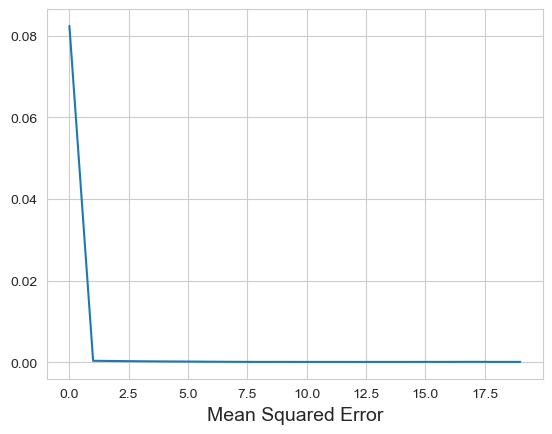

In [93]:
#Training MSE (Mean Squared Error)

plt.plot(history.history['loss'])
plt.xlabel('Mean Squared Error', size=14)

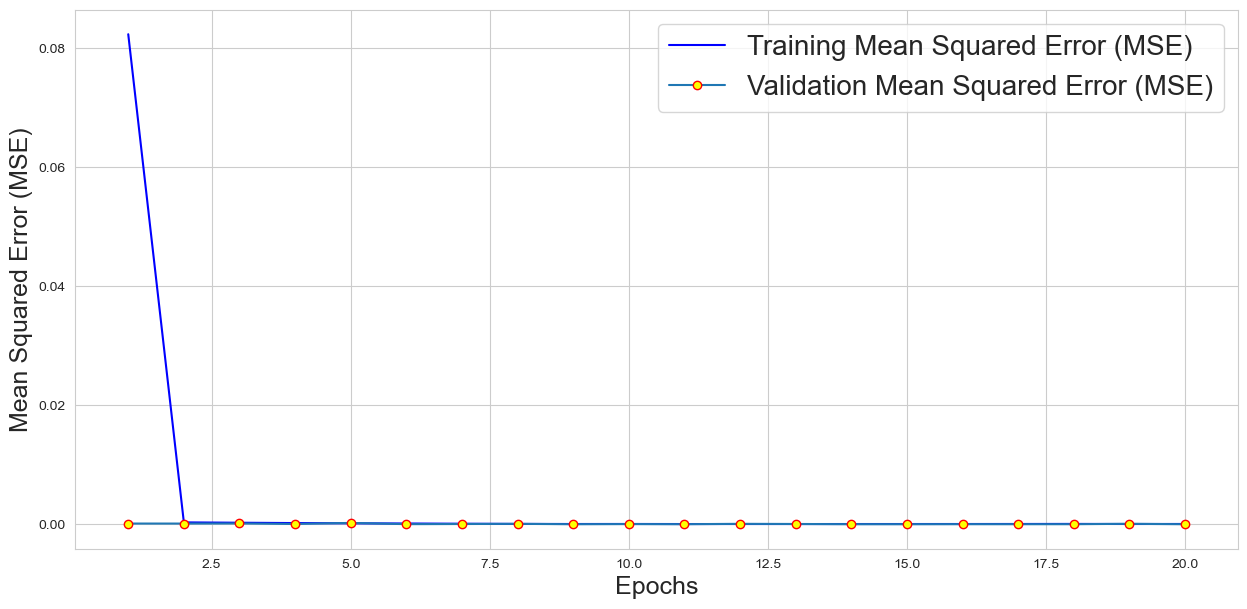

In [94]:
# More detailed MSE graph

history_dict = history.history

mse_values = history_dict['loss']
val_mse_values = history_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

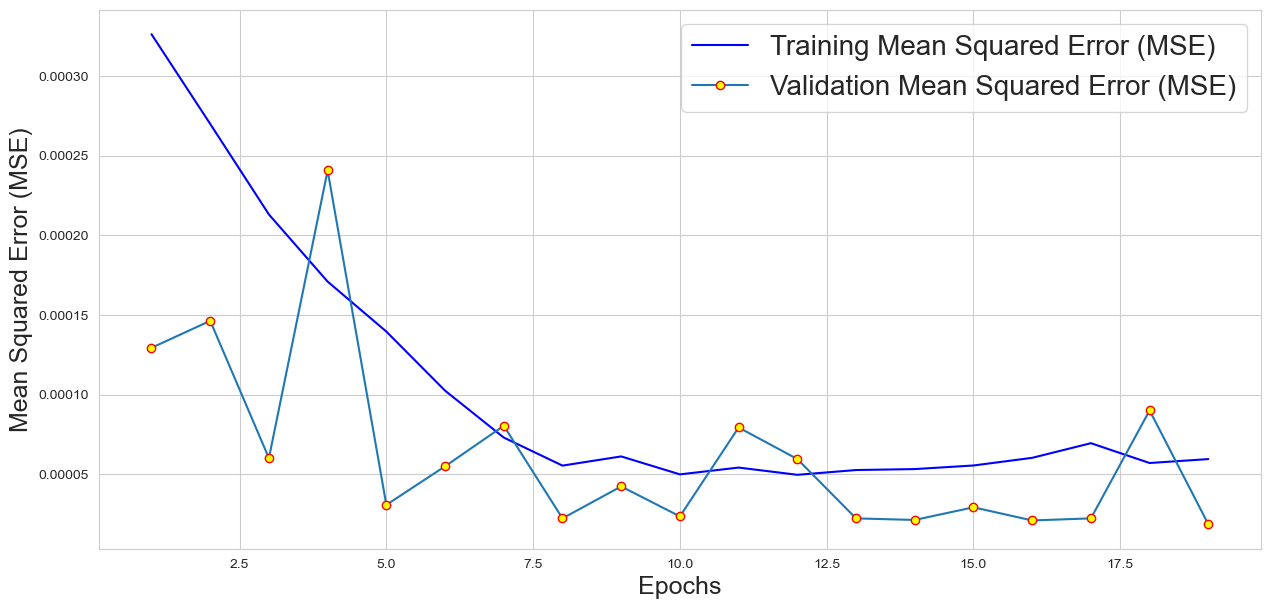

In [95]:
# deleted the 1st epoch
# to examine in detail the results of the remaining epochs

history_dict = history.history

mse_values = history_dict['loss'][1:]
val_mse_values = history_dict['val_loss'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

#### MAE Training Graphs

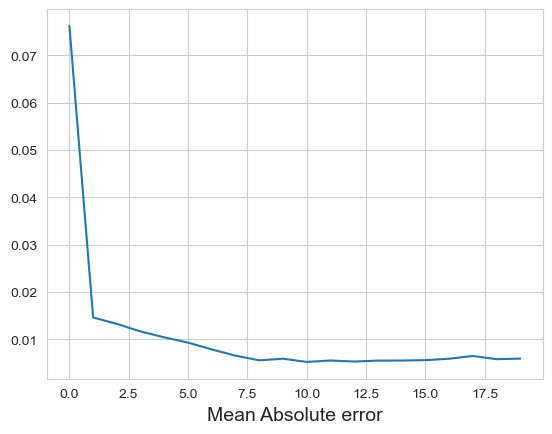

In [96]:
#Training MAE (Mean Absolute Error)

plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute error', size=14)
plt.show()

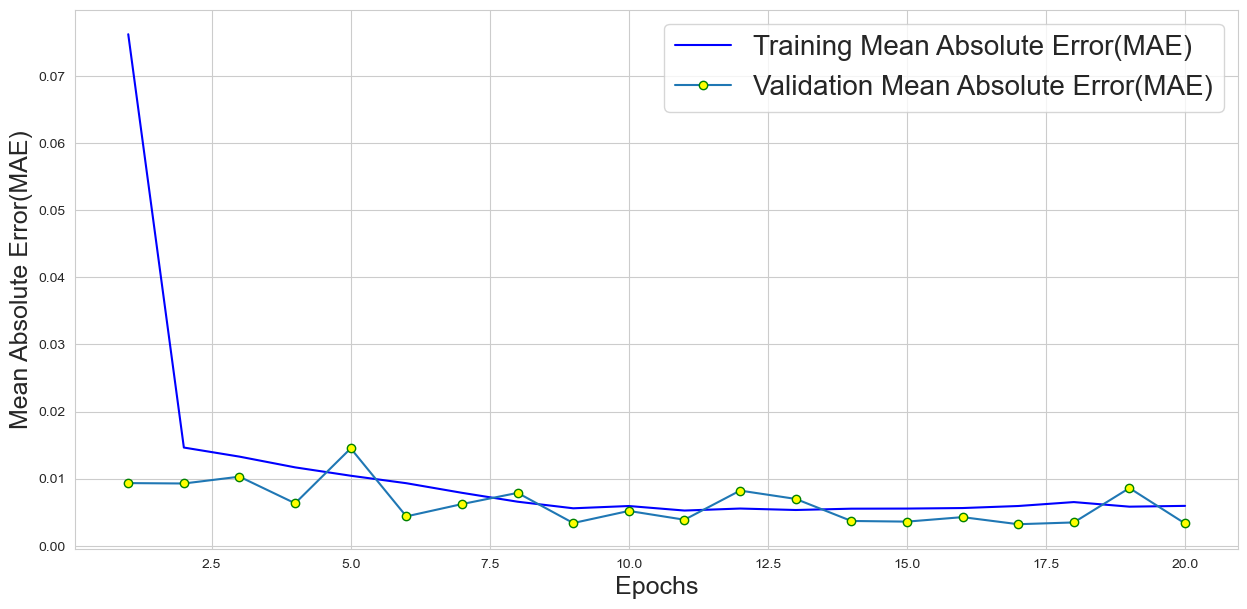

In [97]:
# More detailed MSE graph

history_dict = history.history

mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mae_values, 'b', label='Training Mean Absolute Error(MAE)')
plt.plot(epochs, val_mae_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error(MAE)', size=18)
plt.legend()
plt.show()

#### Prediction 25 minute ahead (DO IT AFTER THE MAE & MSE CHARTS)

In [98]:
pred = LSTM_saved_best_model(X_test)
print(pred)

tf.Tensor(
[[2.3663366 2.3582773]
 [2.3666956 2.3592463]
 [2.3672023 2.3595786]
 ...
 [2.3655214 2.3525746]
 [2.371167  2.357355 ]
 [2.376919  2.3637266]], shape=(595, 2), dtype=float32)


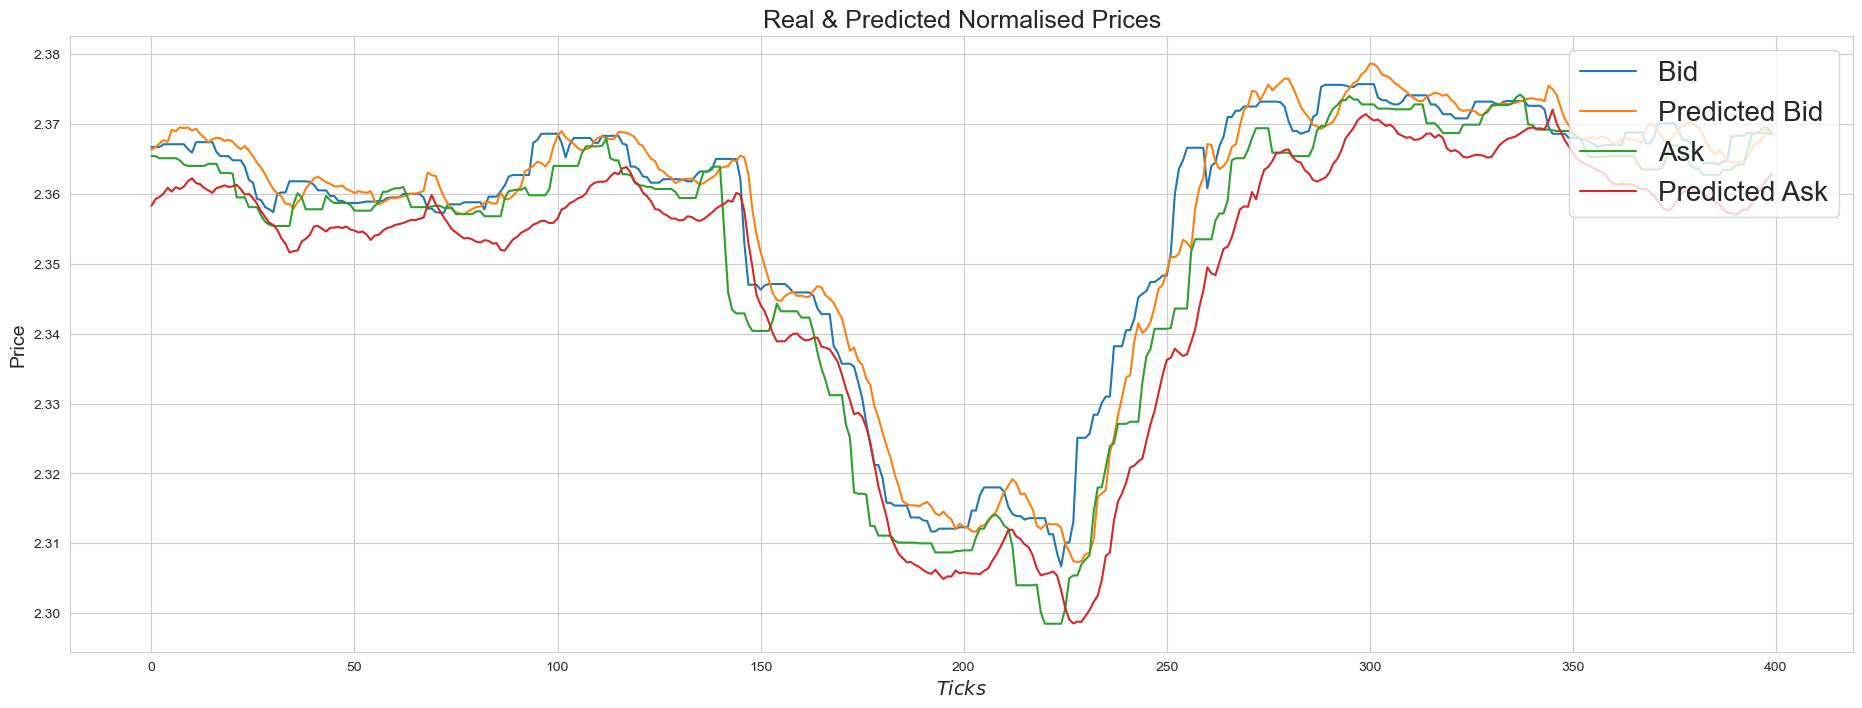

In [99]:
#Normalised Price Chart

plt.ion()
fig = plt.figure(figsize=(23,8))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[:400,0], label='Bid')
line2, = ax1.plot(pred[:400,0], label='Predicted Bid')
line3, = ax1.plot(y_test[0:400,1], label='Ask')
line4, = ax1.plot(pred[:400,1], label='Predicted Ask')

plt.title('Real & Predicted Normalised Prices', size=18)
plt.ylabel('Price', size=14)
plt.xlabel('$Ticks$', size=14)
plt.legend(loc='upper right')

plt.show()

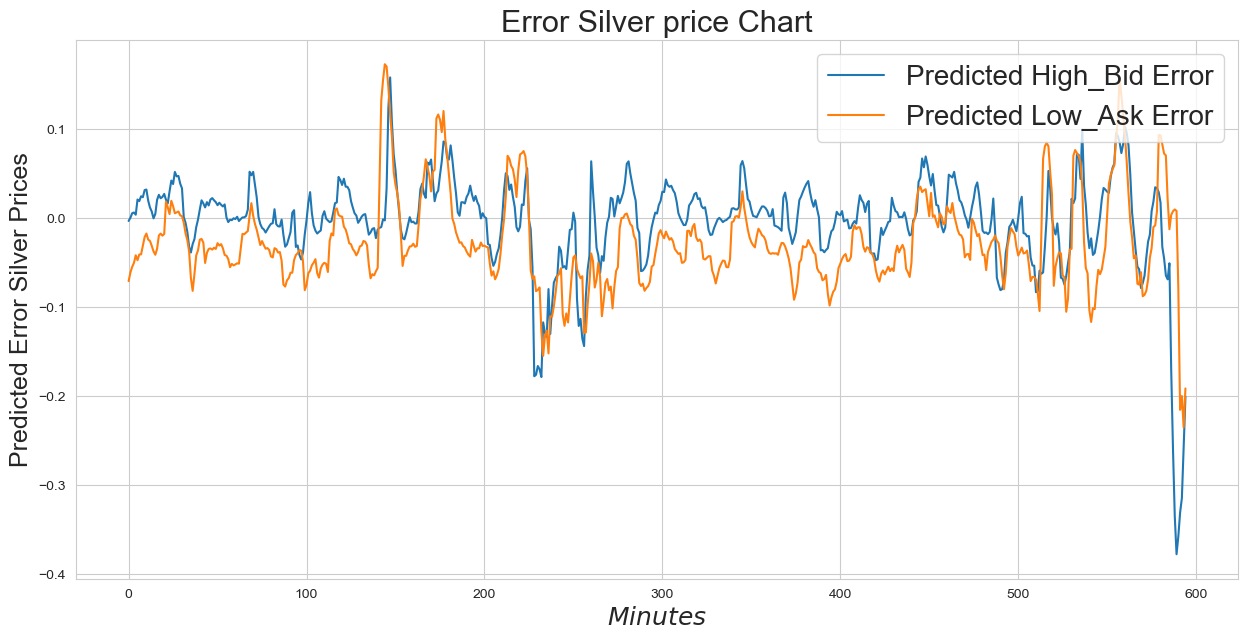

In [100]:
N1=0  # The first minute for the chart  
LL = 1500  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)

# in $ (absolute price)
a = (pred[N1:N2,0] - y_test[N1:N2,0]) *10
b = (pred[N1:N2,1] - y_test[N1:N2,1]) *10

# in %
#a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000/ average_price *100
#b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000/ average_price *100


line1, = ax1.plot(a, label='Predicted High_Bid Error')
line2, = ax1.plot(b, label='Predicted Low_Ask Error')

plt.title('Error Silver price Chart', size=22)
plt.ylabel('Predicted Error Silver Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()

In [ ]:
#For Deltas and volume, we should use min-max normalization. For prices, we can use /10, /100 or /1000. 